## Stroke prediction

<img src="image/stroke.jpg" width="600" height="600" align=left>



The public dataset is acquired from the Kaggle called [Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset). However, the owner of the dataset has specified that the source is classified therefore there is no way to verify where and how this dataset was collected. Therefore, as a disclaimer, the following work should be considered as a toy exercise.

### Attribute Information

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### Exploratory Data Analysis

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [106]:
data = pd.read_csv("data/healthcare-dataset-stroke-data.csv")

In [107]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [108]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


First, let check if we have null values. It seems that we do, as you can see in the BMI.

In [110]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [111]:
data.replace(to_replace=np.nan, value=data.bmi.mean(), inplace=True)

Now let's check if there is anymore null values and there is none (no pun intended). Great, looks good.

In [112]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Stroke risk factors

So let's dive deep into the factors that could potentially increases the chances of getting a stroke. According to [Mayo Clinic's website](https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113) and [NHLBI](https://www.nhlbi.nih.gov/health-topics/stroke), the risk factors include:

- High blood pressure (hypertension)
- Unhealthy diet/lifestyle habits
- Heart diseases
- Smoking
- Diabetes
- High cholesterol
- Age
- Race
- Gender
- Family history
- Work or home environment
- Physical inactivity
- Hormones

Based on those factors, we will try to dissect relevant information for the following EDA. Therefore we need to inquire the following questions:

1. The most obvious one would be describing the correlation between the above mentioned risk factors with potential occurence of a stroke
2. Can we describe the correlation with other health data such as BMI, glucose level

### Gender count

In [113]:
data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

As we can see, there are more female participants in the dataset with 1 counted as "other". This is maybe because there's a participant who wishes to identify themselves as non-binary.

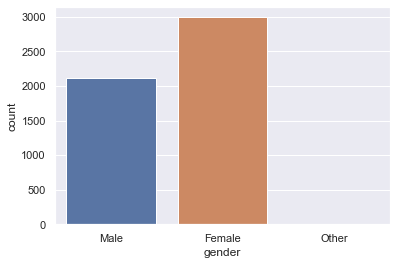

In [114]:
ax = sns.countplot(data=data, x="gender")
plt.show()

### Employment types

Next, we want to know what is the working environment as this is considered to be one of the risk factors.

In [115]:
data.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

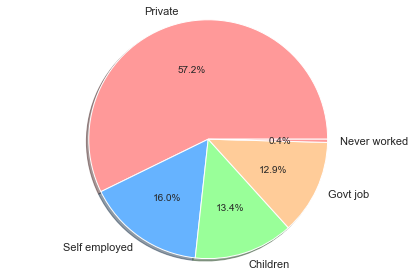

In [175]:
labels = ['Private', 'Self employed', 'Children', 'Govt job', 'Never worked']
sizes = [data.work_type.value_counts()[0], 
         data.work_type.value_counts()[1],
         data.work_type.value_counts()[2], 
         data.work_type.value_counts()[3],
         data.work_type.value_counts()[4]
        ]

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors=colors)
ax1.axis('equal')
plt.tight_layout()
plt.show()

It seems that a huge chunk of the survey participants are working in the private sector. However, the dataset as a whole does not specify what kind of industry that these participants are in. 

### Residence types

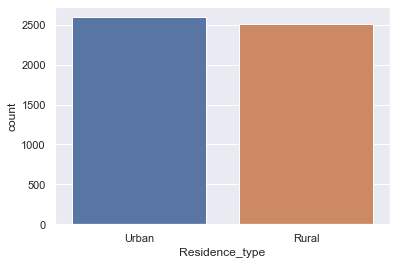

In [117]:
ax = sns.countplot(data=data, x="Residence_type")
plt.show()

### Smoking status
We need to investigate the number of participants who were former smokers, current smokers or none smokers. The unknown group poses a bit of problem because their status is undetermined.

Based on the inspection below, we have more non-smokers in the survey with 37%.

In [150]:
data.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

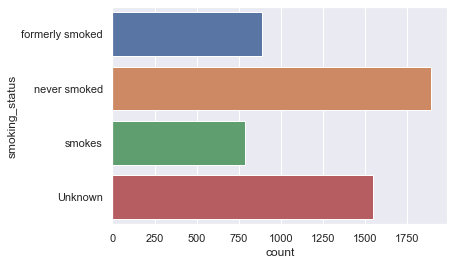

In [147]:
ax2 = sns.countplot(y=data.smoking_status)
plt.show()

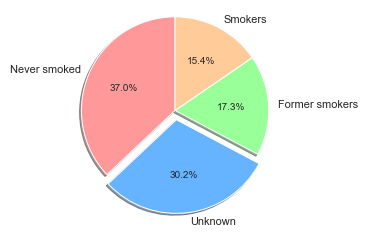

In [174]:
labels = 'Never smoked', 'Unknown', 'Former smokers', 'Smokers'
sizes = [data.smoking_status.value_counts()[0], 
         data.smoking_status.value_counts()[1],
         data.smoking_status.value_counts()[2], 
         data.smoking_status.value_counts()[3]
        ]

explode = (0, 0.1, 0, 0)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
ax1.axis('equal')
plt.show()

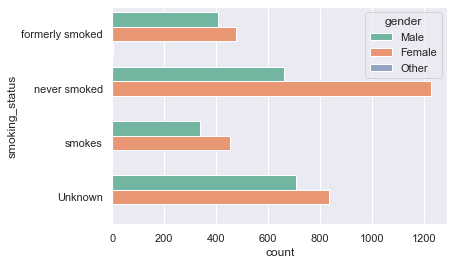

In [119]:
ax2 = sns.countplot(y=data.smoking_status, hue=data.gender, data=data, palette="Set2")
plt.show()

### Smoking status based on residence
We also want to know the residential status of the participants. 

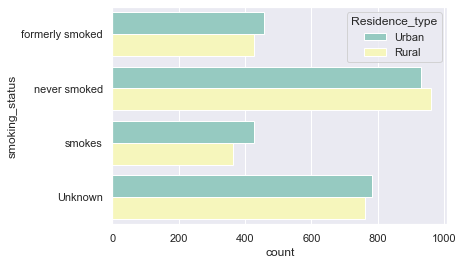

In [120]:
ax2 = sns.countplot(y=data.smoking_status, hue=data.Residence_type, data=data, palette="Set3")
plt.show()

### Hypertension

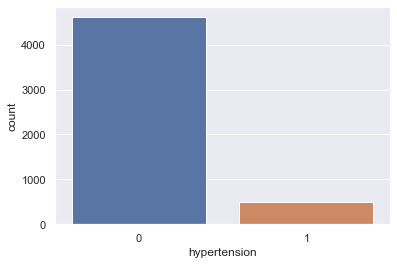

In [121]:
ax = sns.countplot(data=data, x="hypertension")
plt.show()

### Heart disease

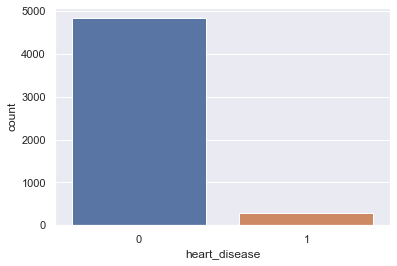

In [122]:
ax = sns.countplot(data=data, x="heart_disease")
plt.show()

### Stroke

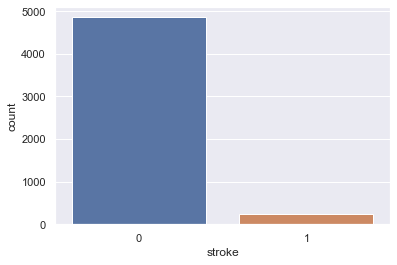

In [152]:
ax = sns.countplot(data=data, x="stroke")
plt.show()

From here, we can clearly see there is an imbalance in our dataset.

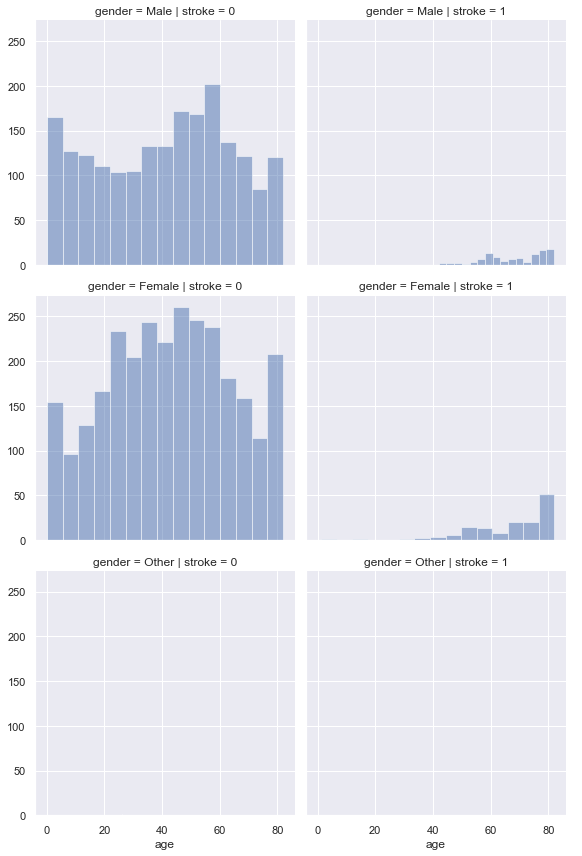

In [123]:
g = sns.FacetGrid(data, row='gender', col='stroke', height=4)
g.map(plt.hist, 'age', alpha=0.5, bins=15)
g.add_legend()
plt.show()

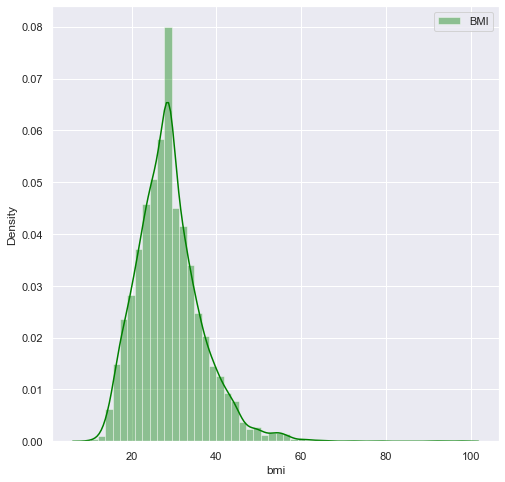

In [138]:
fig = plt.figure(figsize=(8,8))
sns.distplot(data.bmi, color="green", label="BMI", kde= True)
plt.legend()
plt.show()

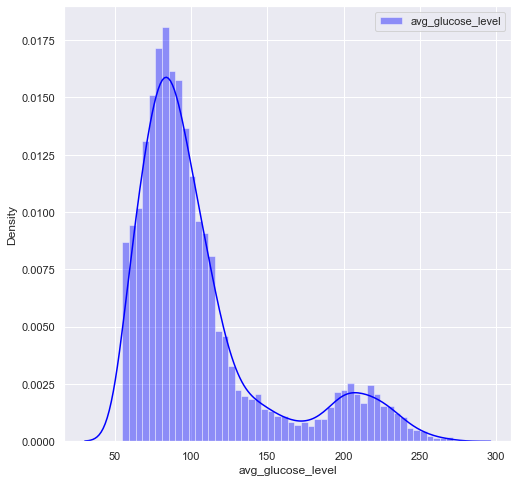

In [139]:
fig = plt.figure(figsize=(8,8))
sns.distplot(data.avg_glucose_level, color="blue", label="avg_glucose_level", kde= True)
plt.legend()
plt.show()

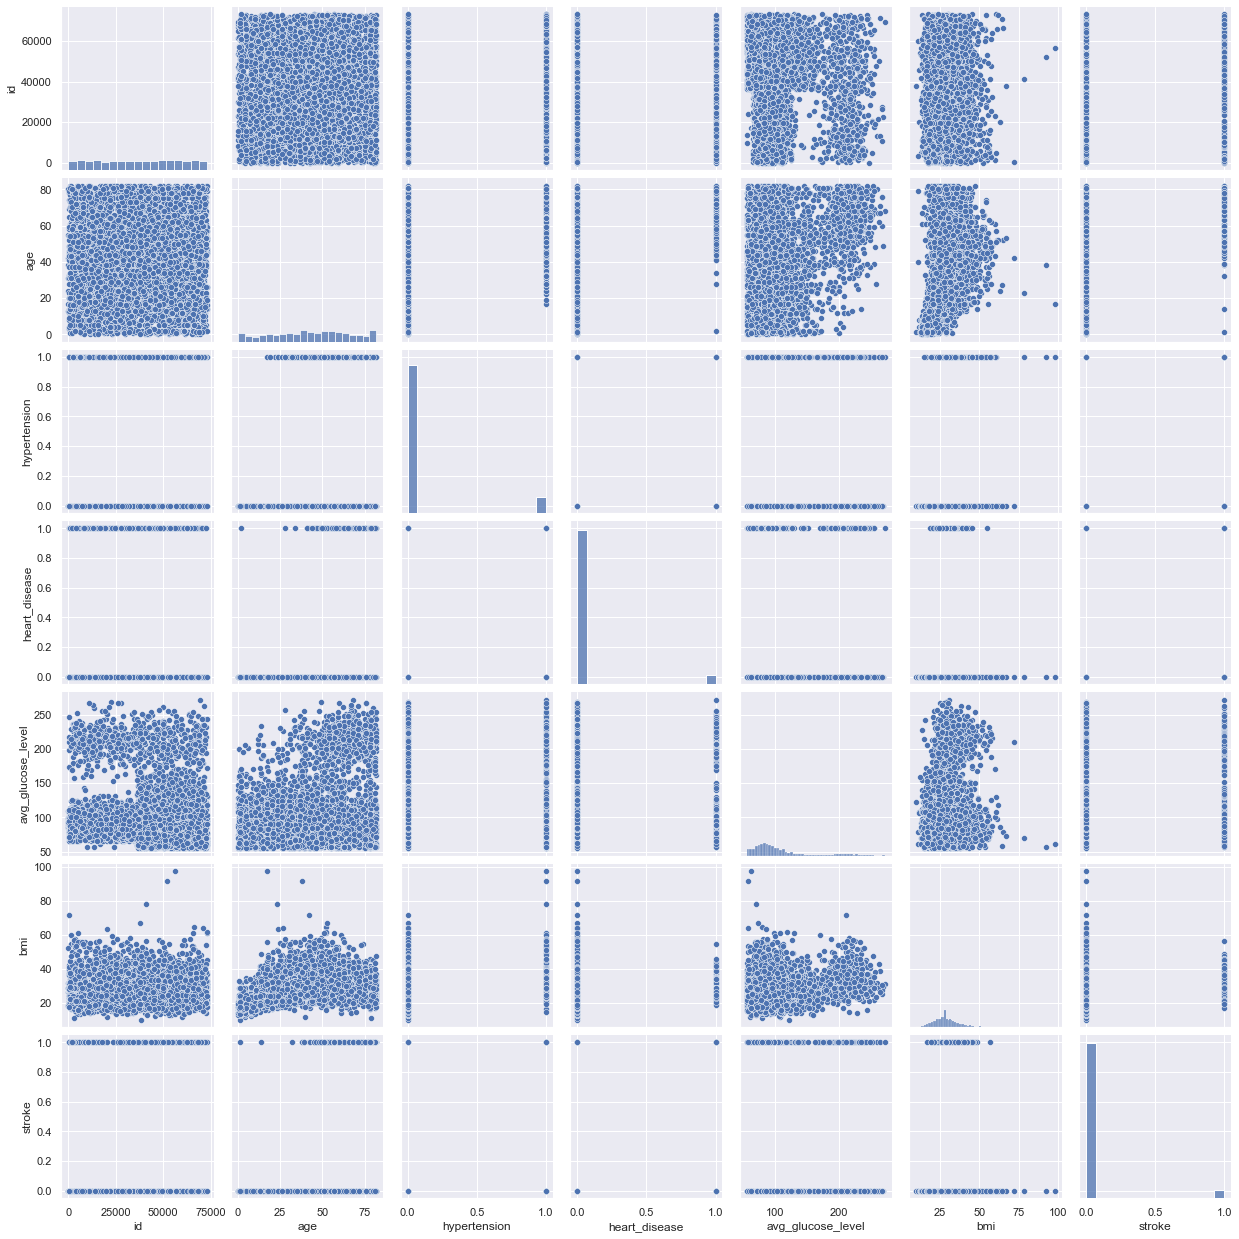

In [137]:
sns.pairplot(data)
plt.show()